In [1]:
!pip install nltk
!pip install wordcloud
!pip install seaborn


In [5]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
data = {
    'Timestamp': [
        '2025-06-01 10:00', '2025-06-01 10:05', '2025-06-01 10:10',
        '2025-06-01 10:15', '2025-06-01 10:20', '2025-06-01 10:25'
    ],
    'Name': ['John', 'Priya', 'Rahul', 'Ananya', 'Meena', 'Amit'],
    'Feedback': [
        'The event was amazing! Loved it.',
        'Food was okay but speakers were great.',
        'I didn’t enjoy the event. It was boring.',
        'Great event. Would attend again!',
        'The technical issues were frustrating.',
        'Very well organized and fun!'
    ]
}


In [8]:
df = pd.DataFrame(data)
df.head()

,Timestamp,Name,Feedback
0,2025-06-01 10:00,John,The event was amazing! Loved it.
1,2025-06-01 10:05,Priya,Food was okay but speakers were great.
2,2025-06-01 10:10,Rahul,I didn’t enjoy the event. It was boring.
3,2025-06-01 10:15,Ananya,Great event. Would attend again!
4,2025-06-01 10:20,Meena,The technical issues were frustrating.


In [9]:
sia = SentimentIntensityAnalyzer()

In [10]:
df['Sentiment_Score'] = df['Feedback'].apply(lambda x: sia.polarity_scores(str(x))['compound'])


In [11]:
def sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [12]:
df['Sentiment_Label'] = df['Sentiment_Score'].apply(sentiment_category)

In [13]:
print(df['Sentiment_Label'].value_counts())

Sentiment_Label
Positive    5
Negative    1
Name: count, dtype: int64


<ipython-input-14-491607884>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment_Label', palette='Set2')


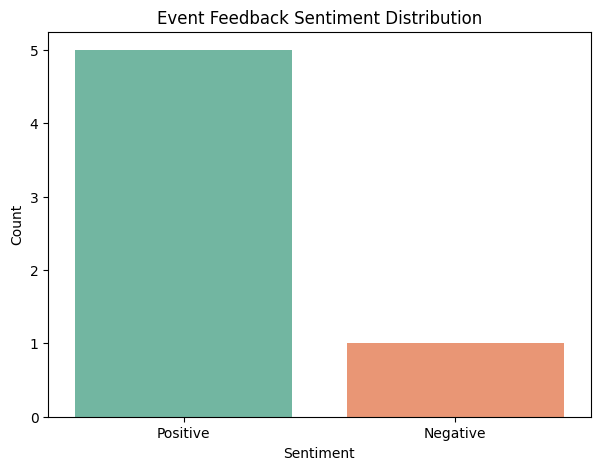

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Sentiment_Label', palette='Set2')
plt.title("Event Feedback Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

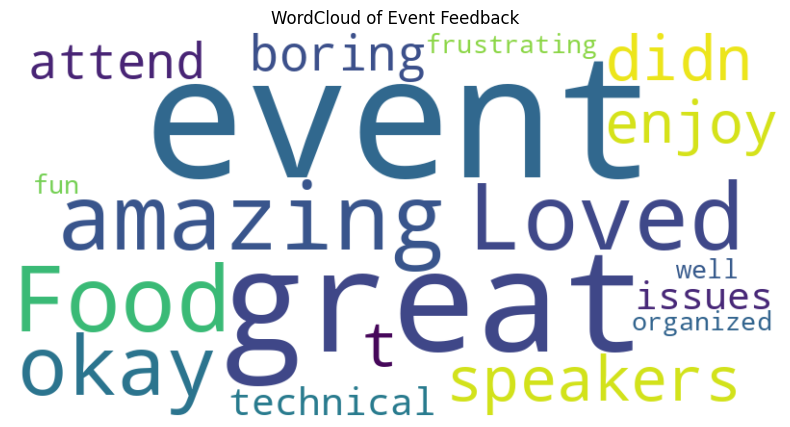

In [15]:
all_feedback = ' '.join(df['Feedback'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_feedback)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Event Feedback")
plt.show()

In [16]:
df

,Timestamp,Name,Feedback,Sentiment_Score,Sentiment_Label
0,2025-06-01 10:00,John,The event was amazing! Loved it.,0.8398,Positive
1,2025-06-01 10:05,Priya,Food was okay but speakers were great.,0.7964,Positive
2,2025-06-01 10:10,Rahul,I didn’t enjoy the event. It was boring.,0.2263,Positive
3,2025-06-01 10:15,Ananya,Great event. Would attend again!,0.6588,Positive
4,2025-06-01 10:20,Meena,The technical issues were frustrating.,-0.4404,Negative
5,2025-06-01 10:25,Amit,Very well organized and fun!,0.7171,Positive
